# Adversarial Attacks with parametrized DPR on VGGFace2

In [1]:
from torch.autograd import Variable
%load_ext autoreload
%autoreload 2

import os.path
import sys

sys.path.append(os.path.join(os.path.dirname(os.path.realpath('__file__')), '..'))

from relighters.DPR.model.defineHourglass_512_gray_skip import HourglassNet
from torch import nn
import torch
import torchvision
import os
from relighters.DPR.face_utils import plot_face_attack, get_sh_with_relighter
from relighters.DPR.spherical_harmonics import get_random_spherical_harmonics

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
from facenet_pytorch import MTCNN

from torchvision import transforms
from torchvision.datasets import ImageFolder
from classifiers.VGGFace2.VGGFace2Classifier import VGGFace2Classifier

from relighters.DPR.preparation import np_rgb_to_torch_lab
from utils.kornia_lab import RgbToLab, LabToRgb
from utils import labels_util

# Classifier
model = VGGFace2Classifier()
model.eval()

VGGFace2Classifier(
  (model): InceptionResnetV1(
    (conv2d_1a): BasicConv2d(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (conv2d_2a): BasicConv2d(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (conv2d_2b): BasicConv2d(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2d_3b): BasicConv2d(
      (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=T

In [2]:
def collate_fn(x):
    return x[0]


# Image standardization used when the vggface2 classifer was trained
def fixed_image_standardization(image_tensor):
    processed_tensor = (image_tensor - 127.5) / 128.0
    return processed_tensor


path = "../data/vggface2-80"

preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

dataset = ImageFolder(path)
dataset.idx_to_class = {i: c for c, i in dataset.class_to_idx.items()}
batch_size = 1
loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

# Load helper files that deal with the different labels
complete_to_subset = labels_util.load_idx_to_label('vggface2')
subset_to_complete = {value: key for key, value in complete_to_subset.items()}

# Cropper
mtcnn = MTCNN(image_size=224, margin=0, min_face_size=20, thresholds=[0.6, 0.7, 0.7],
              factor=0.709, post_process=False)
# Initialize classes for doing LAB transformations
r2l = RgbToLab()
l2r = LabToRgb()

In [3]:
%%capture
modelFolder = '../relighters/DPR/trained_model/'

my_network = HourglassNet()
my_network.load_state_dict(torch.load(os.path.join(modelFolder, 'trained_model_03.t7')))
my_network.train(False)
relighting = my_network
learning_rate = 0.015
max_steps = 50

# Set targeted or untargeted
targeted = True
target_label = 1
sign = -1 if targeted else 1
target_label = torch.tensor(target_label).unsqueeze(0)

successful_iterations = []

#show_image_every = 50

/media/data-hdd/home/anaconda3/envs/mllab2/lib/python3.8/site-packages/torch/tensor.py:746: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  warnings.warn("The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad "


total images processed:  1
adversarial examples:  0
failed relightings:  0
iterations:  49
Unperturbed image was misclassified
total images processed:  2
adversarial examples:  0
failed relightings:  0
iterations:  49
Unperturbed image was misclassified
total images processed:  3
adversarial examples:  0
failed relightings:  0
iterations:  49
total images processed:  4
adversarial examples:  0
failed relightings:  0
iterations:  49
total images processed:  5
adversarial examples:  0
failed relightings:  0
iterations:  49
total images processed:  6
adversarial examples:  0
failed relightings:  0
iterations:  49
total images processed:  7
adversarial examples:  0
failed relightings:  0
iterations:  49
total images processed:  8
adversarial examples:  0
failed relightings:  0
iterations:  49
Unperturbed image was misclassified
total images processed:  9
adversarial examples:  0
failed relightings:  0
iterations:  49
total images processed:  10
adversarial examples:  0
failed relightings: 

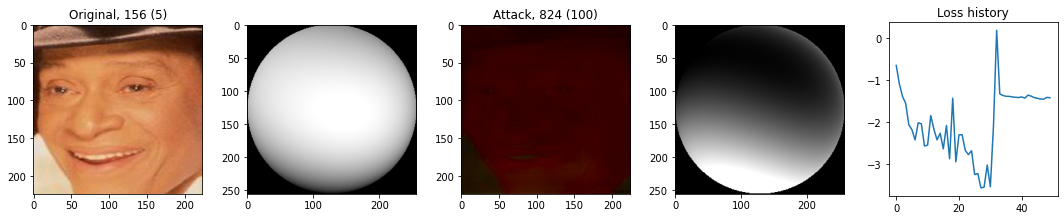

total images processed:  26
adversarial examples:  0
failed relightings:  1
iterations:  49
Unperturbed image was misclassified
Unperturbed image was misclassified
total images processed:  27
adversarial examples:  0
failed relightings:  1
iterations:  49
Unperturbed image was misclassified
Unperturbed image was misclassified
Unperturbed image was misclassified
total images processed:  28
adversarial examples:  0
failed relightings:  1
iterations:  49
Unperturbed image was misclassified
Unperturbed image was misclassified
Unperturbed image was misclassified
Unperturbed image was misclassified
Unperturbed image was misclassified
Unperturbed image was misclassified
total images processed:  29
adversarial examples:  0
failed relightings:  1
iterations:  49
total images processed:  30
adversarial examples:  0
failed relightings:  1
iterations:  49
total images processed:  31
adversarial examples:  0
failed relightings:  1
iterations:  49
total images processed:  32
adversarial examples:  0

total images processed:  101
adversarial examples:  0
failed relightings:  1
iterations:  49
Unperturbed image was misclassified
Unperturbed image was misclassified
total images processed:  102
adversarial examples:  0
failed relightings:  1
iterations:  49
total images processed:  103
adversarial examples:  0
failed relightings:  1
iterations:  49
total images processed:  104
adversarial examples:  0
failed relightings:  1
iterations:  49
total images processed:  105
adversarial examples:  0
failed relightings:  1
iterations:  49
total images processed:  106
adversarial examples:  0
failed relightings:  1
iterations:  49
total images processed:  107
adversarial examples:  0
failed relightings:  1
iterations:  49
Unperturbed image was misclassified
total images processed:  108
adversarial examples:  0
failed relightings:  1
iterations:  49
total images processed:  109
adversarial examples:  0
failed relightings:  1
iterations:  49
Unperturbed image was misclassified
Unperturbed image w

Unperturbed image was misclassified
total images processed:  178
adversarial examples:  0
failed relightings:  1
iterations:  49
total images processed:  179
adversarial examples:  0
failed relightings:  1
iterations:  49
total images processed:  180
adversarial examples:  0
failed relightings:  1
iterations:  49
Unperturbed image was misclassified
total images processed:  181
adversarial examples:  0
failed relightings:  1
iterations:  49
total images processed:  182
adversarial examples:  0
failed relightings:  1
iterations:  49
Unperturbed image was misclassified
Unperturbed image was misclassified
Unperturbed image was misclassified
total images processed:  183
adversarial examples:  0
failed relightings:  1
iterations:  49
total images processed:  184
adversarial examples:  0
failed relightings:  1
iterations:  49
Unperturbed image was misclassified
Unperturbed image was misclassified
total images processed:  185
adversarial examples:  0
failed relightings:  1
iterations:  49
Unpe

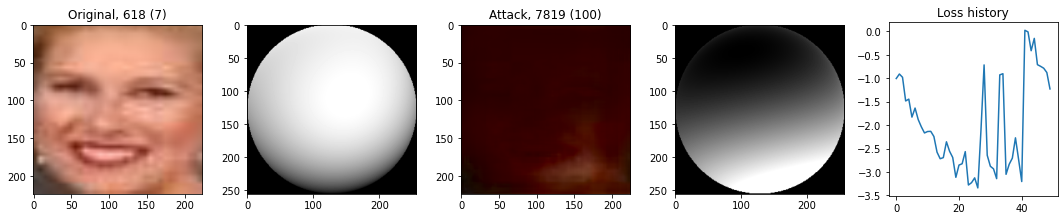

total images processed:  205
adversarial examples:  0
failed relightings:  2
iterations:  49
Unperturbed image was misclassified
Unperturbed image was misclassified
total images processed:  206
adversarial examples:  0
failed relightings:  2
iterations:  49
total images processed:  207
adversarial examples:  0
failed relightings:  2
iterations:  49
total images processed:  208
adversarial examples:  0
failed relightings:  2
iterations:  49
total images processed:  209
adversarial examples:  0
failed relightings:  2
iterations:  49
total images processed:  210
adversarial examples:  0
failed relightings:  2
iterations:  49
total images processed:  211
adversarial examples:  0
failed relightings:  2
iterations:  49
total images processed:  212
adversarial examples:  0
failed relightings:  2
iterations:  49
total images processed:  213
adversarial examples:  0
failed relightings:  2
iterations:  49
total images processed:  214
adversarial examples:  0
failed relightings:  2
iterations:  4

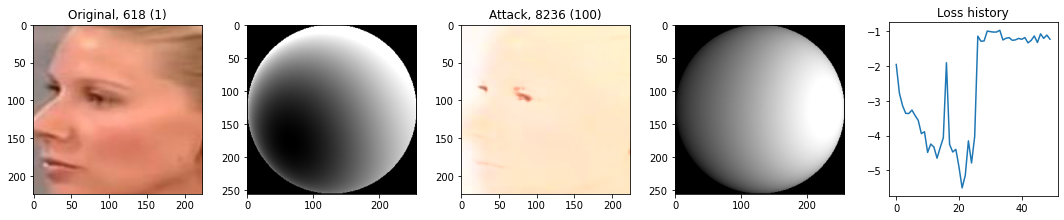

total images processed:  267
adversarial examples:  0
failed relightings:  3
iterations:  49


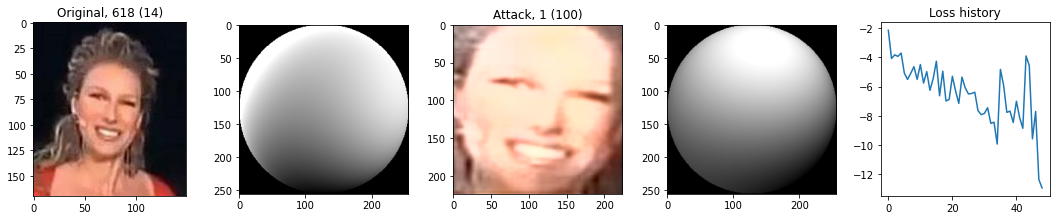

total images processed:  268
adversarial examples:  1
failed relightings:  3
iterations:  48
Unperturbed image was misclassified
total images processed:  269
adversarial examples:  1
failed relightings:  3
iterations:  49
total images processed:  270
adversarial examples:  1
failed relightings:  3
iterations:  49
total images processed:  271
adversarial examples:  1
failed relightings:  3
iterations:  49
total images processed:  272
adversarial examples:  1
failed relightings:  3
iterations:  49
total images processed:  273
adversarial examples:  1
failed relightings:  3
iterations:  49
Unperturbed image was misclassified
total images processed:  274
adversarial examples:  1
failed relightings:  3
iterations:  49
total images processed:  275
adversarial examples:  1
failed relightings:  3
iterations:  49
total images processed:  276
adversarial examples:  1
failed relightings:  3
iterations:  49
total images processed:  277
adversarial examples:  1
failed relightings:  3
iterations:  4

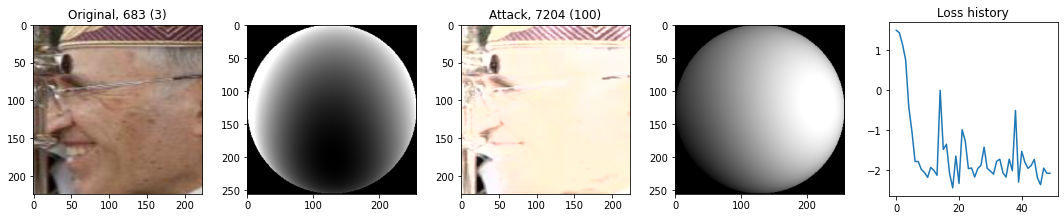

total images processed:  290
adversarial examples:  1
failed relightings:  4
iterations:  49
total images processed:  291
adversarial examples:  1
failed relightings:  4
iterations:  49
total images processed:  292
adversarial examples:  1
failed relightings:  4
iterations:  49
Unperturbed image was misclassified
total images processed:  293
adversarial examples:  1
failed relightings:  4
iterations:  49
Unperturbed image was misclassified
total images processed:  294
adversarial examples:  1
failed relightings:  4
iterations:  49
total images processed:  295
adversarial examples:  1
failed relightings:  4
iterations:  49
Unperturbed image was misclassified
total images processed:  296
adversarial examples:  1
failed relightings:  4
iterations:  49
total images processed:  297
adversarial examples:  1
failed relightings:  4
iterations:  49
total images processed:  298
adversarial examples:  1
failed relightings:  4
iterations:  49
total images processed:  299
adversarial examples:  1
f

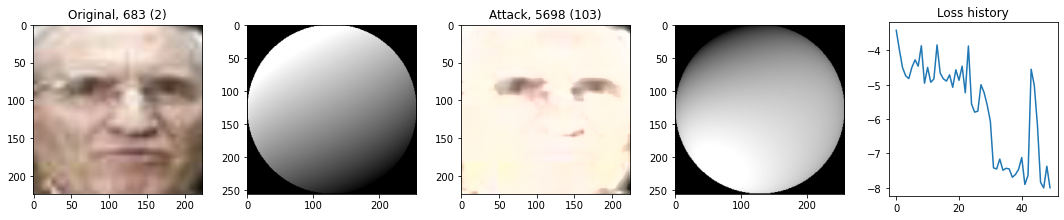

total images processed:  302
adversarial examples:  1
failed relightings:  5
iterations:  49
total images processed:  303
adversarial examples:  1
failed relightings:  5
iterations:  49
total images processed:  304
adversarial examples:  1
failed relightings:  5
iterations:  49
Unperturbed image was misclassified
total images processed:  305
adversarial examples:  1
failed relightings:  5
iterations:  49
Unperturbed image was misclassified
Unperturbed image was misclassified
Unperturbed image was misclassified
Unperturbed image was misclassified
Unperturbed image was misclassified
Unperturbed image was misclassified
Unperturbed image was misclassified
Unperturbed image was misclassified
total images processed:  306
adversarial examples:  1
failed relightings:  5
iterations:  49


In [ ]:
total, ad, f = 0, 0, 0
reg = 0.5

# loop over test data
for id, (image, gt_label) in enumerate(loader):
    gt_label = subset_to_complete[gt_label]
    loss_history = []

    # Get cropped image
    cropped = mtcnn(image)
    if cropped is None:
        print("No Face detected")
        continue

    # Standardize image for classifier
    standardized = fixed_image_standardization(cropped)
    # Predict on clean image
    logits = model(standardized.unsqueeze(0))
    #print(logits.size())
    probs = torch.softmax(logits, dim=1)
    # Get predicted original label
    orig_prob, orig_predicted_label = torch.max(probs, dim=1)

    if orig_predicted_label != gt_label:
        print("Unperturbed image was misclassified")
        continue

    # relighter expects image in range 0;1
    cropped = cropped / 255
    # l-space transformations
    img_lab = np_rgb_to_torch_lab(cropped.numpy().squeeze())
    input_l = img_lab[0,:, :]
    # DPR expects values between 0 and 1, whereas our lab transformation returns the common L values between 0 and 100
    input_l = (input_l/100.0)
    input_l = input_l[None,None, ...]
    input_l = input_l.float()
    input_ab = img_lab[1:,:,: ]
    
    # initialize shade params
    estimated_sh = get_sh_with_relighter(input_l, relighting).detach()
    # Our sh parameter we optimize over
    sh = get_random_spherical_harmonics()

    sh = Variable(torch.from_numpy(sh), requires_grad=True).float()
    sh.retain_grad()

    gt_label = torch.tensor(gt_label).unsqueeze(0)
    model.eval()
    mtcnn.eval()
    i = 0
    # optimization loop to find optimal shade parameters
    with torch.enable_grad():
        for i in range(max_steps):
            model.zero_grad()
            mtcnn.zero_grad()
            if sh.grad is not None:
                sh.grad.zero_()
            sh = Variable(sh, requires_grad=True)
            sh.retain_grad()
            # relight the current image
            out_l, out_sh  = relighting(input_l, sh, 0)
            out_l_perm = out_l[0]
            out_l_scaled = (out_l_perm*100.0)
            output_lab = torch.cat([out_l_scaled.double(), input_ab.double()], dim=0)

            # Transform back to RGB space for Classifier
            output_rgb = l2r.lab_to_rgb(output_lab)

            # After the relighting on the cropped image we do the standardization that the classifier expects
            # The *255 because classifer expects different range
            standardized = fixed_image_standardization(output_rgb * 255)

            logits = model(standardized.unsqueeze(0).float())
            probs = torch.softmax(logits, dim=1)
            # Get predicted original label
            probability, prediction = torch.max(probs, dim=1)

            nll = nn.functional.nll_loss(logits, target_label)
            loss = nll - sign * nll * reg * torch.dist(estimated_sh, sh, p=2)
            loss_history.append(loss)

            # Breaking conditions
            if (targeted and prediction == target_label) or (
                not targeted and prediction != gt_label):
                # Generated image is adversarial
                break


            loss.backward()

            grad = sh.grad

            if grad is None:
                print("Error")

            # Perform gradient ascent or descent update step based on whether we do targeted attack or not
            sh = sh + sign * learning_rate * grad
            
    # plot results
    total += 1
    if torch.mean(output_rgb) < 0.1 or torch.mean(output_rgb) > 0.9:
        f += 1
        print("This is a failed relighting:")
        plot_face_attack(torch.clamp(cropped, 0, 1), torch.clamp(output_rgb, 0, 1), loss_history, sh, out_sh, gt_label,
                         orig_prob, prediction, probability)
    else:
        if not targeted: 
            if gt_label != prediction:
                ad += 1
                successful_iterations.append((True, i))
                plot_face_attack(torch.clamp(transforms.ToTensor()(image), 0, 1), torch.clamp(output_rgb, 0, 1), loss_history, sh, out_sh, gt_label,
                             orig_prob, prediction, probability)
        else:
            if target_label == prediction:
                ad += 1
                successful_iterations.append((True, i))
                plot_face_attack(torch.clamp(transforms.ToTensor()(image), 0, 1), torch.clamp(output_rgb, 0, 1), loss_history, sh, out_sh, gt_label,
                             orig_prob, prediction, probability)

    print("total images processed: ", total)
    print("adversarial examples: ", ad)
    print("failed relightings: ", f)
    print("iterations: ", i)


print(f"Overall success rate: {ad / float(total)}")
print(f"Average number of iterations: {torch.mean(torch.tensor(successful_iterations))}")